In [3]:
import pandas as pd
import datetime


In [4]:
#to load the data back in use
df_full = pd.read_pickle('2019original_turnstile_df.pkl')

In [5]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [6]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [7]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE', 'DateTime' ]).sum().reset_index()


In [8]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,LINENAME,SCP,DATE,DateTime,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,02-00-00,08/31/2019,2019-08-31 00:00:00,7183242,2433142
1,A002,R051,59 ST,NQR456W,02-00-00,08/31/2019,2019-08-31 04:00:00,7183258,2433149
2,A002,R051,59 ST,NQR456W,02-00-00,08/31/2019,2019-08-31 08:00:00,7183278,2433176
3,A002,R051,59 ST,NQR456W,02-00-00,08/31/2019,2019-08-31 12:00:00,7183393,2433262
4,A002,R051,59 ST,NQR456W,02-00-00,08/31/2019,2019-08-31 16:00:00,7183572,2433312
...,...,...,...,...,...,...,...,...,...
995,A002,R051,59 ST,NQR456W,02-03-05,09/18/2019,2019-09-18 20:00:00,11638348,1415122
996,A002,R051,59 ST,NQR456W,02-03-05,09/19/2019,2019-09-19 00:00:00,11638688,1415131
997,A002,R051,59 ST,NQR456W,02-03-05,09/19/2019,2019-09-19 04:00:00,11638734,1415133
998,A002,R051,59 ST,NQR456W,02-03-05,09/19/2019,2019-09-19 08:00:00,11638867,1415184


In [9]:
#check for duplicated values
df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,LINENAME,SCP,DateTime,ENTRIES
383720,R101,R001,SOUTH FERRY,1RW,02-00-07,2019-09-17 05:00:00,2
107675,H039,R375,NEW LOTS,L,00-00-01,2019-09-13 05:00:00,2
107549,H039,R375,NEW LOTS,L,00-00-00,2019-09-13 05:00:00,2
383342,R101,R001,SOUTH FERRY,1RW,02-00-04,2019-09-17 05:00:00,2
0,A002,R051,59 ST,NQR456W,02-00-00,2019-08-31 00:00:00,1
410208,R138,R293,34 ST-PENN STA,123ACE,00-03-02,2019-09-07 10:00:00,1
410203,R138,R293,34 ST-PENN STA,123ACE,00-03-02,2019-09-06 14:00:00,1
410204,R138,R293,34 ST-PENN STA,123ACE,00-03-02,2019-09-06 18:00:00,1
410205,R138,R293,34 ST-PENN STA,123ACE,00-03-02,2019-09-06 22:00:00,1
410206,R138,R293,34 ST-PENN STA,123ACE,00-03-02,2019-09-07 02:00:00,1


Looks like 12 entries have duplicate data all coming from 3 stations, check a few of these out.

It seems like RECOVR AUD has weird values where there is duplicated data, so I will drop those values

Additionally, will check if there are weird values in other places there is a RECOVR AUD value

In [10]:
#RECOVR AUD rows have weird data so lets just drop them all

df_full = df_full[df_full.DESC=='REGULAR']

## find the daily entries

The turnstile counter does not reset each day, it just keeps increasing the count. In order to find the daliy entries, subtract the previous day from the current day.

In [11]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
stations_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE']).sum().reset_index()


In [12]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,08/31/2019,337478073,188333594
1,A002,R051,59 ST,NQR456W,09/01/2019,337522544,188357406
2,A002,R051,59 ST,NQR456W,09/02/2019,337562052,188379518
3,A002,R051,59 ST,NQR456W,09/03/2019,337607485,188412388
4,A002,R051,59 ST,NQR456W,09/04/2019,336398280,183640481


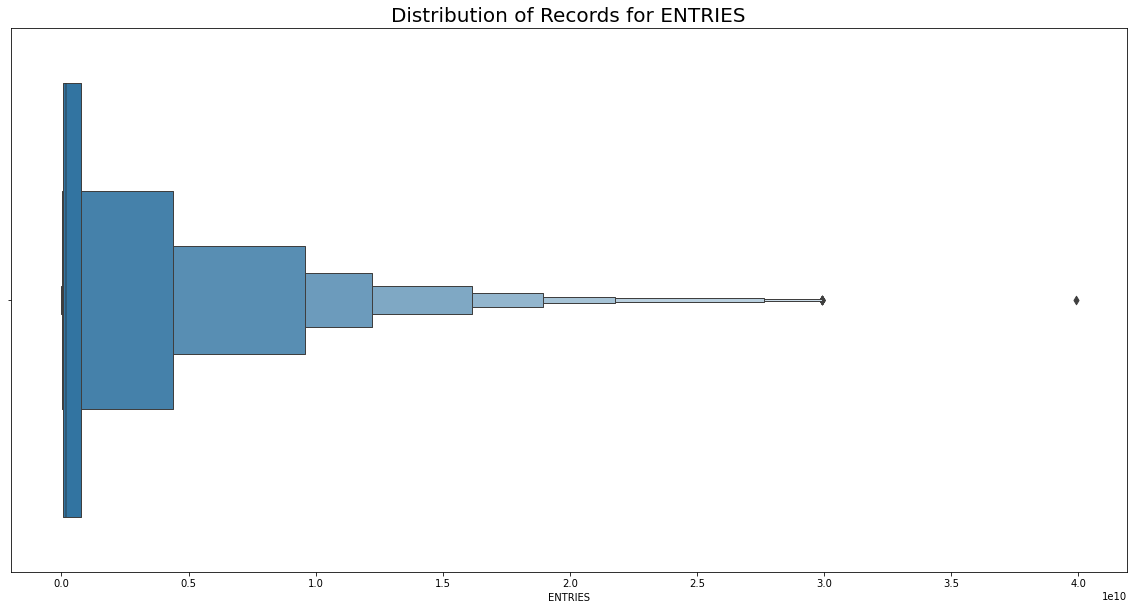

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

Drop outliers

In [14]:
#everything greater than 2.5mill
stations_df = stations_df[stations_df.ENTRIES<=27500000000]

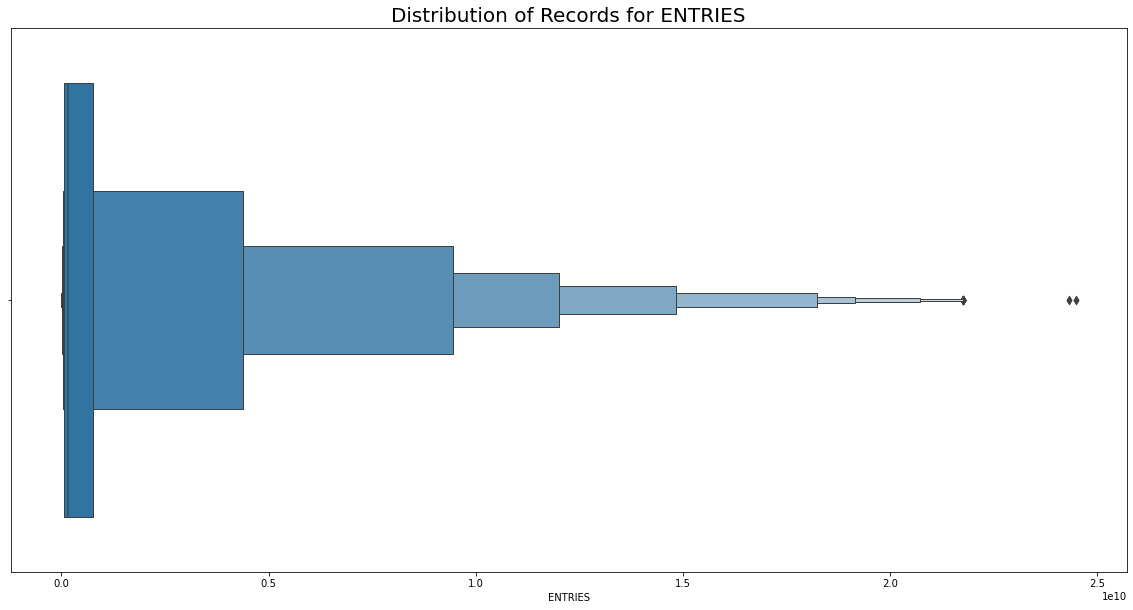

In [15]:
# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

In [16]:
#create two new columns that are the previous day with associated 
#number of entries
stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-16-3c7abcf33e93>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [17]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
0,A002,R051,59 ST,NQR456W,08/31/2019,337478073,188333594,NaN,NaN
1,A002,R051,59 ST,NQR456W,09/01/2019,337522544,188357406,08/31/2019,337478073.0
2,A002,R051,59 ST,NQR456W,09/02/2019,337562052,188379518,09/01/2019,337522544.0
3,A002,R051,59 ST,NQR456W,09/03/2019,337607485,188412388,09/02/2019,337562052.0
4,A002,R051,59 ST,NQR456W,09/04/2019,336398280,183640481,09/03/2019,337607485.0


In [18]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
stations_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [19]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
1,A002,R051,59 ST,NQR456W,09/01/2019,337522544,188357406,08/31/2019,337478073.0
2,A002,R051,59 ST,NQR456W,09/02/2019,337562052,188379518,09/01/2019,337522544.0
3,A002,R051,59 ST,NQR456W,09/03/2019,337607485,188412388,09/02/2019,337562052.0
4,A002,R051,59 ST,NQR456W,09/04/2019,336398280,183640481,09/03/2019,337607485.0
5,A002,R051,59 ST,NQR456W,09/05/2019,337754994,188510490,09/04/2019,336398280.0


In [20]:
#make sure that the count is actually increasing each day
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case
counter_mask = (stations_df['ENTRIES'] < stations_df['Previous_Entries'])
stations_df[counter_mask]

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
4,A002,R051,59 ST,NQR456W,09/04/2019,336398280,183640481,09/03/2019,3.376075e+08
96,A011,R080,57 ST-7 AV,NQRW,09/12/2019,13253810778,9542835472,09/11/2019,1.483490e+10
133,A015,R081,49 ST,NQRW,09/07/2019,214790514,150413303,09/06/2019,2.394314e+08
134,A015,R081,49 ST,NQRW,09/08/2019,202450386,108659924,09/07/2019,2.147905e+08
181,A021,R032,TIMES SQ-42 ST,ACENQRS1237W,09/13/2019,136387397,202198863,09/12/2019,1.635564e+08
...,...,...,...,...,...,...,...,...,...
15541,S101,R070,ST. GEORGE,1,09/01/2019,110813514,128870,08/31/2019,1.280098e+08
15553,S101,R070,ST. GEORGE,1,09/13/2019,128403338,143112,09/12/2019,1.497534e+08
15622,TRAM1,R468,RIT-MANHATTAN,R,09/19/2019,4964697,87882,09/18/2019,7.403307e+06
15623,TRAM1,R468,RIT-MANHATTAN,R,09/20/2019,4495477,81785,09/19/2019,4.964697e+06


In [21]:
#how many tursntiles have this issue?
stations_df[counter_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()


C/A    UNIT  STATION          LINENAME    
A002   R051  59 ST            NQR456W         1
A011   R080  57 ST-7 AV       NQRW            1
A015   R081  49 ST            NQRW            2
A021   R032  TIMES SQ-42 ST   ACENQRS1237W    1
A022   R022  34 ST-HERALD SQ  BDFMNQRW        2
                                             ..
R647   R110  FLATBUSH AV-B.C  25              1
R728   R226  GUN HILL RD      5               1
S101   R070  ST. GEORGE       1               2
TRAM1  R468  RIT-MANHATTAN    R               2
TRAM2  R469  RIT-ROOSEVELT    R               1
Length: 390, dtype: int64

Looks like 352 turnstiles have the reverse counter problem.

This just means that the difference will be negative. we can fix this by considering the absolute value

# Questions

notice that the last few rows had the same values for entries and previous entries

also, our max had only 24 entries the first day and ~900,000 the next.

### How to deal with this type of inconsistent data?

- choose some min and max difference threshold to place on day to day differences?

- put an upper limit that we say is an unreasonable amount?

- lower limit?

In [22]:
#try vinny's method of resetting the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

stations_df['Daily_Entries'] = stations_df.apply(daily_count2, axis=1, max_count=10000)


337522544 337478073.0
337562052 337522544.0
337607485 337562052.0
336398280 337607485.0
337754994 336398280.0
337831803 337754994.0
337902599 337831803.0
337954629 337902599.0
338003919 337954629.0
338079721 338003919.0
338158474 338079721.0
338237242 338158474.0
338315794 338237242.0
338387386 338315794.0
338430420 338387386.0
338476859 338430420.0
338553073 338476859.0
338632395 338553073.0
338713068 338632395.0
338793461 338713068.0
218398751 218363601.0
218427877 218398751.0
218464148 218427877.0
218532372 218464148.0
218602447 218532372.0
218673208 218602447.0
218733203 218673208.0
218776876 218733203.0
218822912 218776876.0
218892721 218822912.0
218966766 218892721.0
219040607 218966766.0
219114035 219040607.0
219174089 219114035.0
219211446 219174089.0
219254377 219211446.0
219326166 219254377.0
219399389 219326166.0
219471428 219399389.0
219547817 219471428.0
78805813 78786841.0
78822896 78805813.0
78838501 78822896.0
78863586 78838501.0
78888269 78863586.0
78913561 78888269.0


188739807 188703907.0
188776953 188739807.0
188813729 188776953.0
188849917 188813729.0
188877515 188849917.0
188896257 188877515.0
188923146 188896257.0
188959528 188923146.0
188997153 188959528.0
189035303 188997153.0
189073163 189035303.0
324290596 324251417.0
324324735 324290596.0
324371068 324324735.0
324434405 324371068.0
324498460 324434405.0
324562917 324498460.0
324617567 324562917.0
324664019 324617567.0
324717231 324664019.0
324784089 324717231.0
324852953 324784089.0
324921403 324852953.0
324988679 324921403.0
325047003 324988679.0
325093814 325047003.0
325148705 325093814.0
325216773 325148705.0
325286301 325216773.0
325355077 325286301.0
325423549 325355077.0
66572385 66559992.0
66583805 66572385.0
66599568 66583805.0
66620536 66599568.0
66642245 66620536.0
66666536 66642245.0
66683591 66666536.0
66700957 66683591.0
66720304 66700957.0
66742883 66720304.0
66767074 66742883.0
66790800 66767074.0
66813815 66790800.0
66832046 66813815.0
66846198 66832046.0
66867314 66846198.

9800253 9787134.0
9823648 9809317.0
9841882 9823648.0
10885624 9841882.0
9879449 10885624.0
9897936 9879449.0
73331581 73320062.0
73342394 73331581.0
73357509 73342394.0
73377799 73357509.0
73399415 73377799.0
73421560 73399415.0
73437959 73421560.0
73449168 73437959.0
73465462 73449168.0
73488218 73465462.0
73511489 73488218.0
73535213 73511489.0
110333598 73535213.0
73575688 110333598.0
73587667 73575688.0
73604952 73587667.0
85850772 73604952.0
73556277 85850772.0
73579364 73556277.0
73602116 73579364.0
18259834 20812921.0
20828403 18259834.0
12481238569 12481219284.0
12481255369 12481238569.0
12481276157 12481255369.0
12481302350 12481276157.0
12481328857 12481302350.0
12481355076 12481328857.0
12481376422 12481355076.0
12481394466 12481376422.0
12481417740 12481394466.0
12481445719 12481417740.0
12481473892 12481445719.0
12481501858 12481473892.0
10401272066 12481501858.0
10401294653 10401272066.0
12481570179 10401294653.0
12481593648 12481570179.0
12481621171 12481593648.0
124816

22048120 22025619.0
22070089 22048120.0
86179407 86166641.0
86195677 86179407.0
71843250 86195677.0
86231815 71843250.0
86245466 86231815.0
86267412 86253888.0
86286710 86267412.0
86306692 86286710.0
86327043 86306692.0
86346817 86327043.0
86361164 86346817.0
86380920 86367994.0
86400524 86380920.0
86420276 86400524.0
57623918 86420276.0
86459690 57623918.0
72836983 72825455.0
72847346 72836983.0
72864555 72847346.0
72888793 72864555.0
72913992 72888793.0
72939978 72913992.0
72957715 72939978.0
72968967 72957715.0
72987809 72968967.0
73014633 72987809.0
73042071 73014633.0
73097645 73046513.0
73116360 73097645.0
73143235 73125195.0
73170186 73143235.0
73197803 73170186.0
73251904 73196389.0
146204481 146190899.0
146224349 146204481.0
146244946 146224349.0
146265459 146244946.0
146279719 146265459.0
146303147 146288288.0
146325137 146303147.0
146347148 146325137.0
170763688 146347148.0
146391068 170763688.0
146406325 146391068.0
146428439 146413993.0
170857709 146428439.0
170884286 1708

83789087 83725398.0
83819664 83789087.0
83860505 83819664.0
83940918 83860505.0
83588477 83940918.0
84101673 83588477.0
84181834 84101673.0
84252801 84181834.0
84297126 84252801.0
84346125 84297126.0
84425451 84346125.0
84508523 84425451.0
84590385 84508523.0
84672394 84590385.0
117673126 117656047.0
117688085 117673126.0
117707212 117688085.0
117732075 117707212.0
117758162 117732075.0
117784972 117758162.0
117806488 117784972.0
117822386 117806488.0
117843117 117822386.0
117869816 117843117.0
117897727 117869816.0
117925666 117897727.0
117953533 117925666.0
117978144 117953533.0
118000987 117978144.0
118025592 118000987.0
118051997 118025592.0
118078749 118051997.0
118105867 118078749.0
118132771 118105867.0
97958917 97947666.0
97980252 97968338.0
97996124 97980252.0
98012935 97996124.0
98030501 98012935.0
98044774 98030501.0
98055345 98044774.0
98068807 98055345.0
98085952 98068807.0
98103481 98085952.0
98121735 98103481.0
98139967 98121735.0
98156897 98139967.0
98174376 98156897.0


108825345 108806601.0
108870955 108825345.0
108919358 108870955.0
108968517 108919358.0
109008417 108968517.0
109028702 109008417.0
109050188 109028702.0
109098076 109050188.0
109147847 109098076.0
109199135 109147847.0
109250302 109199135.0
109290594 109250302.0
109308628 109290594.0
109330846 109308628.0
109379723 109330846.0
109430670 109379723.0
109482232 109430670.0
109533430 109482232.0
9066722799 9066696760.0
9066744271 9066722799.0
9066779102 9066744271.0
9066869256 9066779102.0
9062185302 9066869256.0
9067057442 9062185302.0
9067130669 9067057442.0
9067166268 9067130669.0
9067210540 9067166268.0
9067308046 9067210540.0
9067409881 9067308046.0
9067510314 9067409881.0
9067608171 9067510314.0
9067684728 9067608171.0
9067718256 9067684728.0
9060471328 9067718256.0
9067862145 9060471328.0
9067964628 9067862145.0
9068064309 9067964628.0
9068167422 9068064309.0
2608777771 2608751870.0
2608799806 2608777771.0
2608833595 2608799806.0
2608928018 2608833595.0
2609023611 2608928018.0
2609

11962948 14352364.0
14357563 11962948.0
3881963729 3881953379.0
3881974647 3881963729.0
3881986026 3881974647.0
3235028449 3882025747.0
5176057687 3235028449.0
3882048736 5176057687.0
3882066895 3882054938.0
3882078926 3882066895.0
3882090809 3882078926.0
3882102536 3882090809.0
19279129 19262634.0
19293428 19279129.0
19313094 19293428.0
19340362 19313094.0
19368050 19340362.0
19396555 19368050.0
19418980 19396555.0
19434459 19418980.0
19452845 19434459.0
19474228 19452845.0
19496343 19474228.0
19518835 19496343.0
19540411 19518835.0
19553927 19540411.0
19567117 19554192.0
19596193 19567117.0
19625768 19596193.0
19655290 19625768.0
19684488 19655290.0
133494188 133480841.0
133506612 133494188.0
133522677 133506612.0
133543193 133522677.0
133565063 133543193.0
133587867 133565063.0
133606466 133587867.0
133620000 133606466.0
133637843 133620000.0
133661024 133637843.0
133684668 133661024.0
133708385 133684668.0
133732329 133708385.0
133751739 133732329.0
133765506 133751739.0
133783841 

104607462 104571397.0
104643814 104607462.0
104680408 104643814.0
255927588 255893298.0
255958183 255927588.0
256005490 255958183.0
256075694 256005490.0
256147151 256075694.0
256217549 256147151.0
256271478 256217549.0
256310448 256271478.0
256363936 256310448.0
256438969 256363936.0
256512754 256438969.0
256586801 256512754.0
256659694 256586801.0
256717607 256659694.0
256757786 256717607.0
256812268 256757786.0
256886003 256812268.0
256961471 256886003.0
257036781 256961471.0
257110749 257036781.0
94164328 94149769.0
94187301 94164328.0
94210867 94187301.0
94234478 94210867.0
94251430 94234478.0
94261978 94251430.0
94278311 94261978.0
94301969 94278311.0
94326140 94301969.0
94350775 94326140.0
94374748 94350775.0
94392610 94374748.0
94403173 94392610.0
94419650 94403173.0
110183479 94419650.0
94468903 110183479.0
94493662 94468903.0
94517428 94493662.0
190125464 190112377.0
190136868 190125464.0
190159123 190136868.0
190192582 190159123.0
190227014 190192582.0
190262865 190227014.0


81611293 81598491.0
81638466 81611293.0
81667728 81638466.0
81697285 81667728.0
81721436 81697285.0
81732399 81721436.0
81747131 81732399.0
81777033 81747131.0
81808126 81777033.0
81839790 81808126.0
81871106 81839790.0
81895625 81871106.0
81906488 81895625.0
81921147 81906488.0
81950378 81921147.0
81981602 81950378.0
82013192 81981602.0
82043122 82013192.0
90468266 90456911.0
90491484 90477963.0
90520988 90491484.0
90552011 90520988.0
90583594 90552011.0
90611623 90583594.0
90626401 90611623.0
90641905 90626401.0
90674107 90641905.0
90707928 90674107.0
90740374 90707928.0
90774327 90740374.0
90805758 90774327.0
90823347 90805758.0
90840897 90823347.0
90873207 90840897.0
90906888 90873207.0
90939868 90906888.0
90972903 90939868.0
119725359 119706227.0
119741703 119725359.0
119759022 119741703.0
119791205 119759022.0
119825924 119791205.0
119860738 119825924.0
119892953 119860738.0
119918613 119892953.0
119941764 119918613.0
119975937 119941764.0
120011871 119975937.0
120048332 12001187

343793249 187482287.0
187586598 343793249.0
187616503 187586598.0
187626835 187616503.0
187658817 187626835.0
187712087 187658817.0
187765982 187712087.0
187818788 187765982.0
187869708 187818788.0
793577808 793527181.0
793621245 793577808.0
793688415 793621245.0
793801943 793688415.0
662684948 793801943.0
794043771 662684948.0
794143084 794043771.0
794212413 794143084.0
661914112 794212413.0
794414500 661914112.0
794540906 794414500.0
794667143 794540906.0
794790310 794667143.0
794890714 794790310.0
794960322 794890714.0
795044094 794960322.0
795165146 795044094.0
795288718 795165146.0
795414864 795288718.0
795540628 795414864.0
35461250 42533334.0
42570713 35461250.0
42603130 42570713.0
42671274 42603130.0
42743953 42671274.0
42817981 42743953.0
42878381 42817981.0
42902954 42878381.0
35784077 42902954.0
37981503 35784077.0
43088566 37981503.0
43166686 43088566.0
43244554 43166686.0
43304441 43244554.0
43329851 43304441.0
43366846 43329851.0
43441898 43366846.0
43519222 43441898.0
43

8876251728 8876183511.0
8876323232 8876251728.0
8876394748 8876323232.0
8876464772 8876394748.0
8876533667 8876464772.0
8876583518 8876533667.0
8876629884 8876583518.0
8876698130 8876629884.0
8876771955 8876698130.0
8876847010 8876771955.0
8876923063 8876847010.0
194839739 194818144.0
194859143 194839739.0
194883881 194859143.0
192266180 194883881.0
194969524 192266180.0
195015187 194969524.0
195053985 195015187.0
195084258 195053985.0
195114480 195084258.0
195158675 195114480.0
195206488 195158675.0
195254529 195206488.0
195300738 195254529.0
195341052 195300738.0
195370782 195341052.0
195402938 195370782.0
195448512 195402938.0
195495722 195448512.0
195544374 195495722.0
195592959 195544374.0
146156732 146143444.0
146168144 146156732.0
146184686 146168144.0
146219274 146184686.0
146257126 146219274.0
146297219 146257126.0
146332467 146297219.0
146351305 146332467.0
146371941 146351305.0
146410847 146371941.0
146452338 146410847.0
146492549 146452338.0
122112985 146492549.0
146569036 

341520808 284544654.0
341591092 341520808.0
341666045 341591092.0
341736894 341666045.0
398770958 341736894.0
341878165 398770958.0
341949944 341878165.0
342020666 341949944.0
4765343046 4765330843.0
4765355291 4765343046.0
4765367383 4765355291.0
4765378979 4765367383.0
4765411661 4765398861.0
4765424869 4765411661.0
4765437990 4765424869.0
4765450984 4765437990.0
4765476843 4765464800.0
4765489249 4765476843.0
4765501868 4765489249.0
4765514575 4765501868.0
171882663 171856408.0
171906906 171882663.0
143279160 171906906.0
171976672 143279160.0
172016809 171976672.0
172058361 172016809.0
172094413 172058361.0
172125532 172094413.0
172159463 172125532.0
172201567 172159463.0
172244872 172201567.0
172288589 172244872.0
172331789 172288589.0
145785765 172331789.0
172358358 145785765.0
172375223 172358358.0
172415962 172375223.0
143717964 172415962.0
172500991 143717964.0
172544446 172500991.0
37386505 37376262.0
37408526 37395863.0
37426051 37408526.0
37443851 37426051.0
37461605 3744385

78959979 78807263.0
79022023 78959979.0
65934901 79022023.0
79328471 65934901.0
79535322 79328471.0
79740925 79535322.0
79943639 79740925.0
80088949 79943639.0
79718217 80088949.0
78957766 79718217.0
79156738 78957766.0
79360517 79156738.0
79564438 79360517.0
79762136 79564438.0
549878062 549845738.0
549906476 549878062.0
549979238 549906476.0
550157265 549979238.0
550344371 550157265.0
550528998 550344371.0
550667230 550528998.0
550713887 550667230.0
550795250 550713887.0
550982888 550795250.0
551175272 550982888.0
551368981 551175272.0
551559199 551368981.0
551707484 551559199.0
551770028 551707484.0
551863649 551770028.0
552058348 551863649.0
552251545 552058348.0
552449946 552251545.0
552642844 552449946.0
128269084 128252065.0
128283485 128269084.0
128312530 128283485.0
128390756 128312530.0
128472410 128390756.0
128554793 128472410.0
128622488 128554793.0
128641742 128622488.0
128672764 128641742.0
128755571 128672764.0
128841013 128755571.0
128927215 128841013.0
129014260 128927

87470228 87439206.0
87511141 87470228.0
87559954 87511141.0
87610293 87559954.0
87660134 87610293.0
87710217 87660134.0
90530042 90519716.0
90544084 90530042.0
90558661 90544084.0
90574756 90558661.0
90589902 90574756.0
90600798 90589902.0
90613740 90600798.0
90632069 90613740.0
90650933 90632069.0
90669668 90650933.0
90688287 90669668.0
90705081 90688287.0
90716640 90705081.0
90731680 90716640.0
90750357 90731680.0
90769767 90750357.0
90788838 90769767.0
90807584 90788838.0
10285824708 10285803745.0
10285844182 10285824708.0
10285865743 10285844182.0
10285894009 10285865743.0
10256842992 10285894009.0
10285955148 10256842992.0
10285983670 10285955148.0
10286006163 10285983670.0
10286031754 10286006163.0
10286062213 10286031754.0
10286093112 10286062213.0
10286124714 10286093112.0
10275096985 10286124714.0
10286187396 10275096985.0
10286211380 10286187396.0
10286242602 10286211380.0
10286274647 10286242602.0
10286306347 10286274647.0
10286339461 10286306347.0
10286373055 10286339461.0


1603971763 1611222829.0
1589369096 1603971763.0
1589473299 1589369096.0
1589575339 1589473299.0
142491070 142470315.0
142528910 142491070.0
142567685 142528910.0
142608398 142567685.0
142637764 142608398.0
142653359 142637764.0
142680236 142653359.0
142722319 142680236.0
142765132 142722319.0
142808690 142765132.0
142850798 142808690.0
142883323 142850798.0
142903134 142883323.0
142932512 142903134.0
166803627 142932512.0
143019257 166803627.0
143063432 143019257.0
143106635 143063432.0
12482869 12466698.0
12499935 12482869.0
12517638 12499935.0
12529061 12517638.0
12546455 12534739.0
12564563 12546455.0
12582722 12564563.0
12600571 12582722.0
12617829 12600571.0
10525059 12617829.0
12637104 10525059.0
12649038 12637104.0
12666782 12649038.0
12685147 12666782.0
12703514 12685147.0
12721515 12703514.0
107743246 107730919.0
107771695 107752011.0
107809306 107771695.0
107848951 107809306.0
107890105 107848951.0
107920060 107890105.0
107932820 107920060.0
107954851 107932820.0
107996577 10

70076411 70048314.0
70092153 70076411.0
70109876 70092153.0
70141576 70109876.0
70173585 70141576.0
70205520 70173585.0
70237981 70205520.0
100652542 100638340.0
100663709 100652542.0
100680966 100663709.0
100711993 100680966.0
100745022 100711993.0
100778719 100745022.0
100803686 100778719.0
100820176 100803686.0
100840780 100820176.0
100874471 100840780.0
100909856 100874471.0
100945235 100909856.0
100979515 100945235.0
101006114 100979515.0
101021652 101006114.0
101041990 101021652.0
101075635 101041990.0
101110929 101075635.0
101146206 101110929.0
101181459 101146206.0
322920952 322862274.0
322975602 322920952.0
323062163 322975602.0
323187437 323062163.0
323316564 323187437.0
323448817 323316564.0
323550741 323448817.0
323614820 323550741.0
323704750 323614820.0
323839906 323704750.0
323974916 323839906.0
324108682 323974916.0
324241704 324108682.0
324345402 324241704.0
324411688 324345402.0
324503382 324411688.0
324638156 324503382.0
324775889 324638156.0
324912314 324775889.0
32

In [23]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
1,A002,R051,59 ST,NQR456W,09/01/2019,337522544,188357406,08/31/2019,337478073.0,0.0
2,A002,R051,59 ST,NQR456W,09/02/2019,337562052,188379518,09/01/2019,337522544.0,0.0
3,A002,R051,59 ST,NQR456W,09/03/2019,337607485,188412388,09/02/2019,337562052.0,0.0
4,A002,R051,59 ST,NQR456W,09/04/2019,336398280,183640481,09/03/2019,337607485.0,0.0
5,A002,R051,59 ST,NQR456W,09/05/2019,337754994,188510490,09/04/2019,336398280.0,0.0


In [24]:
stations_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
3434,J025,R003,CYPRESS HILLS,J,09/11/2019,43390578,25815715,09/10/2019,4.338058e+07,9999.0
14267,R516,R291,33 ST-RAWSON ST,7,09/08/2019,177334451,169297367,09/07/2019,1.773245e+08,9998.0
11033,R177,R273,145 ST,1,09/08/2019,4765388976,11154486425,09/07/2019,4.765379e+09,9997.0
1891,C027,R216,BAY RIDGE-95 ST,R,09/01/2019,127906437,121181954,08/31/2019,1.278964e+08,9991.0
3435,J025,R003,CYPRESS HILLS,J,09/12/2019,43400567,25822086,09/11/2019,4.339058e+07,9989.0
1519,C004,R089,JAY ST-METROTEC,R,09/07/2019,1219874954,104453851,09/06/2019,1.219865e+09,9985.0
5836,N181A,R464,AQUEDUCT RACETR,A,09/19/2019,328912975,103803737,09/18/2019,3.289030e+08,9985.0
9998,R119,R320,CANAL ST,1,09/02/2019,70838892,26666124,09/01/2019,7.082891e+07,9981.0
2968,H033,R313,BUSHWICK AV,L,09/07/2019,41283588,35133402,09/06/2019,4.127361e+07,9976.0
4622,N068,R012,34 ST-PENN STA,ACE,09/02/2019,139673001,62338266,09/01/2019,1.396630e+08,9973.0


In [25]:
#drop the zero daily entres
stations_df = stations_df[stations_df.Daily_Entries !=0]

In [26]:
#add the combination of station and line name
stations_df['STATION_LINE'] = stations_df['STATION'] + ' ' + stations_df['LINENAME']
stations_df

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
141,A015,R081,49 ST,NQRW,09/15/2019,202746768,108825150,09/14/2019,202746763.0,5.0,49 ST NQRW
156,A016,R081,49 ST,NQRW,09/09/2019,155332592,70344322,09/08/2019,155326452.0,6140.0,49 ST NQRW
162,A016,R081,49 ST,NQRW,09/15/2019,155469258,70424317,09/14/2019,155469248.0,10.0,49 ST NQRW
163,A016,R081,49 ST,NQRW,09/16/2019,155475412,70431083,09/15/2019,155469258.0,6154.0,49 ST NQRW
253,A029,R082,28 ST,NRW,09/01/2019,139247032,206666120,08/31/2019,139247008.0,24.0,28 ST NRW
...,...,...,...,...,...,...,...,...,...,...,...
15598,S102,R165,TOMPKINSVILLE,1,09/16/2019,14347449,419232,09/15/2019,14345498.0,1951.0,TOMPKINSVILLE 1
15599,S102,R165,TOMPKINSVILLE,1,09/17/2019,14352256,419232,09/16/2019,14347449.0,4807.0,TOMPKINSVILLE 1
15600,S102,R165,TOMPKINSVILLE,1,09/18/2019,14357232,419232,09/17/2019,14352256.0,4976.0,TOMPKINSVILLE 1
15601,S102,R165,TOMPKINSVILLE,1,09/19/2019,14362223,419232,09/18/2019,14357232.0,4991.0,TOMPKINSVILLE 1


In [27]:
stations_df.describe()

,ENTRIES,EXITS,Previous_Entries,Daily_Entries
count,2.089000e+03,2.089000e+03,2.089000e+03,2089.000000
mean,1.357995e+09,1.139723e+09,1.357989e+09,5570.684538
std,3.395774e+09,3.313816e+09,3.395774e+09,2915.464093
min,8.948000e+03,2.860200e+04,8.946000e+03,1.000000
25%,2.318069e+07,1.427222e+07,2.317468e+07,3536.000000
50%,4.908465e+07,5.141674e+07,4.907775e+07,5853.000000
75%,5.089911e+08,1.104176e+08,5.089870e+08,8154.000000
max,2.176638e+10,2.356586e+10,2.176637e+10,9999.000000


## Some vis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries', ylabel='Density'>

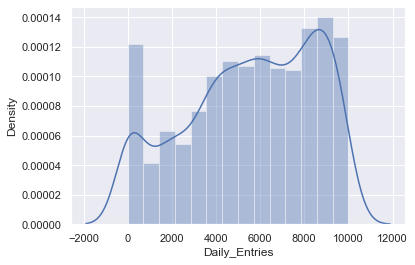

In [29]:
sns.distplot(stations_df['Daily_Entries']
             [stations_df['Daily_Entries'] < 50000])

investigate stations that have the same name but different locations

In [30]:
stations_daily = (stations_df.groupby(['STATION', 'LINENAME', 'DATE'])['Daily_Entries'].sum().reset_index())

stations_daily.head(10)

,STATION,LINENAME,DATE,Daily_Entries
0,1 AV,L,09/15/2019,120.0
1,104 ST,A,09/01/2019,3597.0
2,104 ST,A,09/02/2019,3340.0
3,104 ST,A,09/03/2019,5670.0
4,104 ST,A,09/04/2019,8037.0
5,104 ST,A,09/05/2019,7731.0
6,104 ST,A,09/08/2019,3485.0
7,104 ST,A,09/09/2019,5634.0
8,104 ST,A,09/10/2019,7917.0
9,104 ST,A,09/11/2019,8002.0


In [31]:
stations_daily['STATION_LINE'] = stations_daily['STATION'] + ' ' + stations_daily['LINENAME']
stations_daily

,STATION,LINENAME,DATE,Daily_Entries,STATION_LINE
0,1 AV,L,09/15/2019,120.0,1 AV L
1,104 ST,A,09/01/2019,3597.0,104 ST A
2,104 ST,A,09/02/2019,3340.0,104 ST A
3,104 ST,A,09/03/2019,5670.0,104 ST A
4,104 ST,A,09/04/2019,8037.0,104 ST A
...,...,...,...,...,...
1782,WTC-CORTLANDT,1,09/20/2019,10345.0,WTC-CORTLANDT 1
1783,ZEREGA AV,6,09/01/2019,3856.0,ZEREGA AV 6
1784,ZEREGA AV,6,09/02/2019,3398.0,ZEREGA AV 6
1785,ZEREGA AV,6,09/03/2019,9489.0,ZEREGA AV 6


In [32]:
top10_stations = \
    (stations_daily.groupby(['STATION_LINE'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION_LINE.head(10))
top10_stations.head(10)

241       WTC-CORTLANDT 1
139         FLUSHING AV G
156      HOWARD BCH JFK A
231    W 8 ST-AQUARIUM FQ
221        SUTPHIN BLVD F
234            WALL ST 45
155          HOUSTON ST 1
226            UNION ST R
10              135 ST BC
194          OCEAN PKWY Q
Name: STATION_LINE, dtype: object

In [33]:
stations_daily_top10 = stations_df[stations_df['STATION_LINE'].isin(top10_stations)]
stations_daily_top10

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
1430,B032,R264,OCEAN PKWY,Q,09/02/2019,45556806,32436333,09/01/2019,45547358.0,9448.0,OCEAN PKWY Q
1431,B032,R264,OCEAN PKWY,Q,09/03/2019,45566172,32440968,09/02/2019,45556806.0,9366.0,OCEAN PKWY Q
1436,B032,R264,OCEAN PKWY,Q,09/08/2019,45626489,32470180,09/07/2019,45616984.0,9505.0,OCEAN PKWY Q
1443,B032,R264,OCEAN PKWY,Q,09/15/2019,45715242,32513312,09/14/2019,45706107.0,9135.0,OCEAN PKWY Q
1450,B034,R264,OCEAN PKWY,Q,09/01/2019,66926998,60368061,08/31/2019,66924016.0,2982.0,OCEAN PKWY Q
...,...,...,...,...,...,...,...,...,...,...,...
11440,R204A,R043,WALL ST,45,09/16/2019,11336815,34054506,09/15/2019,11335608.0,1207.0,WALL ST 45
11441,R204A,R043,WALL ST,45,09/17/2019,11340607,34068907,09/16/2019,11336815.0,3792.0,WALL ST 45
11442,R204A,R043,WALL ST,45,09/18/2019,11344448,34084002,09/17/2019,11340607.0,3841.0,WALL ST 45
11443,R204A,R043,WALL ST,45,09/19/2019,11348317,34098915,09/18/2019,11344448.0,3869.0,WALL ST 45


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION_LINE'>

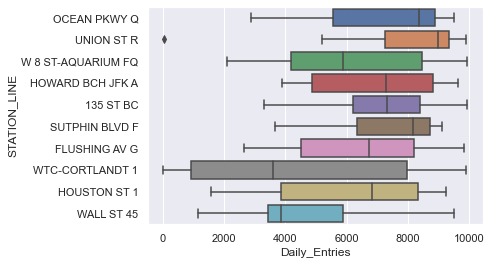

In [34]:
sns.boxplot('Daily_Entries', 'STATION_LINE',data=stations_daily_top10)

get top 25 stations

In [35]:
top25_stations = \
    (stations_daily.groupby(['STATION_LINE'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION_LINE.head(25))
top25_stations

241       WTC-CORTLANDT 1
139         FLUSHING AV G
156      HOWARD BCH JFK A
231    W 8 ST-AQUARIUM FQ
221        SUTPHIN BLVD F
234            WALL ST 45
155          HOUSTON ST 1
226            UNION ST R
10              135 ST BC
194          OCEAN PKWY Q
129           DITMAS AV F
4                111 ST A
79             AVENUE N F
113            CANAL ST 1
206         PROSPECT AV R
29         182-183 STS BD
167     KINGSTON-THROOP C
216           SPRING ST 6
186     NEW UTRECHT AV ND
149            GRAND ST L
52               46 ST MR
240     WOODHAVEN BLVD JZ
50               36 ST MR
148           GRAHAM AV L
85             BAY PKWY N
Name: STATION_LINE, dtype: object

In [36]:
stations_daily_top25 = stations_df[stations_df['STATION_LINE'].isin(top25_stations)]


In [37]:
stations_daily_top25.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
1430,B032,R264,OCEAN PKWY,Q,09/02/2019,45556806,32436333,09/01/2019,45547358.0,9448.0,OCEAN PKWY Q
1431,B032,R264,OCEAN PKWY,Q,09/03/2019,45566172,32440968,09/02/2019,45556806.0,9366.0,OCEAN PKWY Q
1436,B032,R264,OCEAN PKWY,Q,09/08/2019,45626489,32470180,09/07/2019,45616984.0,9505.0,OCEAN PKWY Q
1443,B032,R264,OCEAN PKWY,Q,09/15/2019,45715242,32513312,09/14/2019,45706107.0,9135.0,OCEAN PKWY Q
1450,B034,R264,OCEAN PKWY,Q,09/01/2019,66926998,60368061,08/31/2019,66924016.0,2982.0,OCEAN PKWY Q


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION_LINE'>

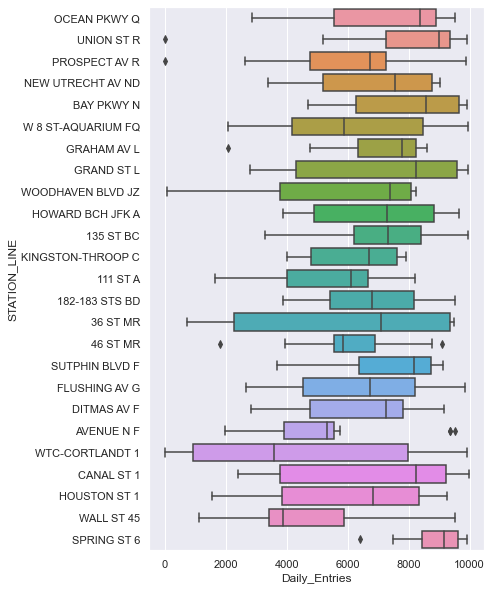

In [38]:
plt.figure(figsize = (6, 10))
sns.boxplot('Daily_Entries', 'STATION_LINE', data=stations_daily_top25)

checking the values to make sure we don't have anything crazy

In [39]:
stations_daily[stations_daily["STATION"] == "TIMES SQ-42 ST"].max()

STATION         NaN
LINENAME        NaN
DATE            NaN
Daily_Entries   NaN
STATION_LINE    NaN
dtype: float64

In [40]:
stations_daily[stations_daily["STATION_LINE"] == "34 ST-PENN STA ACE"].max()


STATION              34 ST-PENN STA
LINENAME                        ACE
DATE                     09/08/2019
Daily_Entries                 13770
STATION_LINE     34 ST-PENN STA ACE
dtype: object

In [41]:
entries_mask = (stations_daily['Daily_Entries'] > 10000)
stations_daily[entries_mask]

,STATION,LINENAME,DATE,Daily_Entries,STATION_LINE
32,111 ST,A,09/03/2019,11735.0,111 ST A
36,111 ST,A,09/07/2019,10561.0,111 ST A
38,111 ST,A,09/09/2019,12689.0,111 ST A
43,111 ST,A,09/14/2019,11134.0,111 ST A
45,111 ST,A,09/16/2019,12924.0,111 ST A
...,...,...,...,...,...
1777,WTC-CORTLANDT,1,09/15/2019,11199.0,WTC-CORTLANDT 1
1778,WTC-CORTLANDT,1,09/16/2019,13566.0,WTC-CORTLANDT 1
1779,WTC-CORTLANDT,1,09/17/2019,10670.0,WTC-CORTLANDT 1
1780,WTC-CORTLANDT,1,09/18/2019,10107.0,WTC-CORTLANDT 1


## try to split by weekend and weekday traffic

In [42]:
#import time

In [43]:
stations_daily_top25_copy = stations_daily_top25.copy()

In [44]:
#make a new column thats a date time object to put day of the week
stations_daily_top25_copy['Dateobject'] = pd.to_datetime(stations_daily_top25_copy['DATE'], format='%m/%d/%Y')

In [45]:
stations_daily_top25_copy['Day_of_Week'] = stations_daily_top25_copy['Dateobject'].dt.dayofweek

In [46]:
stations_daily_top25_copy

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE,Dateobject,Day_of_Week
1430,B032,R264,OCEAN PKWY,Q,09/02/2019,45556806,32436333,09/01/2019,45547358.0,9448.0,OCEAN PKWY Q,2019-09-02,0
1431,B032,R264,OCEAN PKWY,Q,09/03/2019,45566172,32440968,09/02/2019,45556806.0,9366.0,OCEAN PKWY Q,2019-09-03,1
1436,B032,R264,OCEAN PKWY,Q,09/08/2019,45626489,32470180,09/07/2019,45616984.0,9505.0,OCEAN PKWY Q,2019-09-08,6
1443,B032,R264,OCEAN PKWY,Q,09/15/2019,45715242,32513312,09/14/2019,45706107.0,9135.0,OCEAN PKWY Q,2019-09-15,6
1450,B034,R264,OCEAN PKWY,Q,09/01/2019,66926998,60368061,08/31/2019,66924016.0,2982.0,OCEAN PKWY Q,2019-09-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,R216,R322,SPRING ST,6,09/10/2019,27848933,173548525,09/09/2019,27839357.0,9576.0,SPRING ST 6,2019-09-10,1
11583,R216,R322,SPRING ST,6,09/12/2019,27869362,173668312,09/11/2019,27859672.0,9690.0,SPRING ST 6,2019-09-12,3
11588,R216,R322,SPRING ST,6,09/17/2019,27940848,173982654,09/16/2019,27931977.0,8871.0,SPRING ST 6,2019-09-17,1
11589,R216,R322,SPRING ST,6,09/18/2019,27950330,174048623,09/17/2019,27940848.0,9482.0,SPRING ST 6,2019-09-18,2


In [47]:
weekdays_mask = (stations_daily_top25_copy['Day_of_Week'].isin([0,1,2,3,4]))

In [48]:
weekday_df = stations_daily_top25_copy[weekdays_mask]

In [49]:
weekend_mask = (stations_daily_top25_copy['Day_of_Week'].isin([5,6]))

In [50]:
weekend_df = stations_daily_top25_copy[weekend_mask]

In [51]:
weekday_graph_data = weekday_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)
weekend_graph_data = weekend_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)


In [52]:
weekday_graph_data

,Daily_Entries
STATION_LINE,
135 ST BC,63846.0
46 ST MR,78160.0
BAY PKWY N,80349.0
GRAND ST L,88146.0
AVENUE N F,88788.0
SPRING ST 6,96012.0
GRAHAM AV L,96094.0
36 ST MR,97294.0
182-183 STS BD,98308.0


In [53]:
weekdayx = list(weekday_graph_data.index)
weekdayy = list(weekday_graph_data['Daily_Entries'])
weekendx = list(weekend_graph_data.index)
weekendy = list(weekend_graph_data['Daily_Entries'])

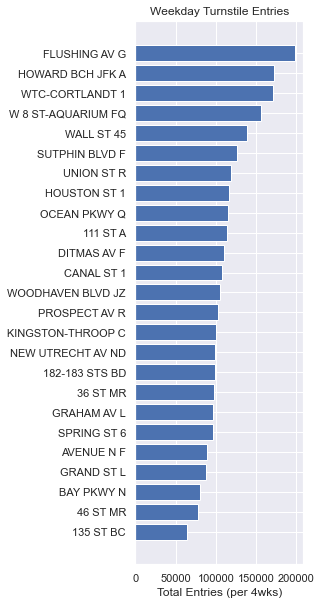

In [54]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekday Turnstile Entries')
plt.barh(weekdayx,weekdayy)
plt.savefig('weekday_plot.png', dpi=300, bbox_inches='tight');

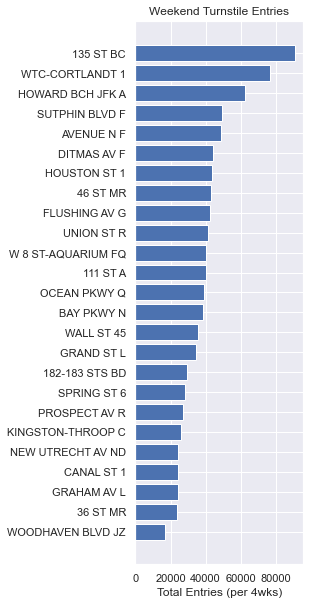

In [55]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekend Turnstile Entries')
plt.barh(weekendx,weekendy)
plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight');

In [56]:
#pickle our top 25 stations data
stations_daily_top25.to_pickle('2019stations_daily_top25.pkl')